# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#%matplotlib inline
#from IPython import get_ipython
from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [4]:
def q1():
    # Retorne aqui o resultado da questão 1.
    quartis = dataframe.quantile(q = [0.25, 0.50, 0.75])
    dif_quartis = quartis["normal"] - quartis["binomial"]
    dif_quartis = round(dif_quartis, 3)
    return tuple(dif_quartis)

In [5]:
q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

### Passos usados para a questão 1

**Visualisando as primeiras linhas**

In [6]:
# Sua análise da parte 1 começa aqui.
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


**Visualisando os quartis**

In [7]:
dataframe.quantile(q = [0.25, 0.50, 0.75]).reset_index()

,index,normal,binomial
0,0.25,17.309638,17.0
1,0.50,19.989620,20.0
2,0.75,22.684324,23.0


**Obtendo os quartis**

In [8]:
quartis = dataframe.quantile(q = [0.25, 0.50, 0.75])

**Calculando a diferença entre os quartis das colunas**

In [9]:
dif_quartis = quartis["normal"] - quartis["binomial"]

**Usando o método ".round()"**

In [10]:
dif_quartis = round(dif_quartis, 3)

print(tuple(dif_quartis))

(0.31, -0.01, -0.316)


## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [11]:
def q2():
    # Retorne aqui o resultado da questão 2.
    l_inf = dataframe["normal"].mean() - dataframe["normal"].std()
    l_sup = dataframe["normal"].mean() + dataframe["normal"].std()
    fda_empirica = ECDF(dataframe["normal"])
    prob_inter = fda_empirica(l_sup) - fda_empirica(l_inf)
    return prob_inter.round(3)

In [12]:
q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

### Passos usados na questão 2

**Calculando a média da coluna "normal"**

In [13]:
dataframe["normal"].mean()

19.991456066526293

**Calculando o desvio padrão da coluna "normal"**

In [14]:
dataframe["normal"].std()

4.013849522013614

**Calculando os limites inferior e superior**

In [15]:
l_inf = dataframe["normal"].mean() - dataframe["normal"].std()
l_inf

15.977606544512678

In [16]:
l_sup = dataframe["normal"].mean() + dataframe["normal"].std()
l_sup

24.00530558853991

**Obtendo a função de distribuição acumulada empirica da coluna "normal"**

In [17]:
fda_empirica = ECDF(dataframe["normal"])

**Calculando a probabilidade P(X<b)**

In [18]:
fda_empirica(l_sup)

0.8409

**Calculando a probabilidade P(X<a)**

In [19]:
fda_empirica(l_inf)

0.1571

**Calculando P(a < X < b)= P(X<b) - P(X<a). Isto é, obtendo a probabilidade da variável aleatória estar entre l_inf e l_sup**

In [20]:
prob_inter = fda_empirica(l_sup) - fda_empirica(l_inf)

In [21]:
prob_inter.round(3)

0.684

**Para refletir:**

* Esse valor se aproxima do esperado teórico? **SIM!!**

Teoricamente a variavel tem distribuição Normal com média 20 e variância 16 (desvio parão = 4)

In [22]:
prob_teorica = sct.norm.cdf(l_sup, loc = 20, scale = 4 ) - sct.norm.cdf(l_inf, loc = 20, scale = 4)

In [23]:
prob_teorica.round(3)

0.684

**Para refletir:**

* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

**calculando os limites para $[\bar{x} - 2s, \bar{x} + 2s]$**

In [24]:
l_inf2 = dataframe["normal"].mean() - 2*dataframe["normal"].std() 

In [25]:
l_sup2 = dataframe["normal"].mean() + 2*dataframe["normal"].std() 

**Calculando os limites para $[\bar{x} - 3s, \bar{x} + 3s]$**

In [26]:
l_inf3 = dataframe["normal"].mean() - 3*dataframe["normal"].std() 

In [27]:
l_sup3 = dataframe["normal"].mean() + 3*dataframe["normal"].std() 

**Calculando $P(\bar{x} - 2s < X < \bar{x} + 2s)$**

In [28]:
prob_inter2 = fda_empirica(l_sup2) - fda_empirica(l_inf2)
print(prob_inter2.round(3))

0.954


**Calculando $P(\bar{x} - 3s < X < \bar{x} + 3s)$**

In [29]:
prob_inter3 = fda_empirica(l_sup3) - fda_empirica(l_inf3)
print(prob_inter3.round(3))

0.997


**Visualisando o gráfico da distribuição acumulada empirica**

In [30]:
prob = fda_empirica(dataframe["normal"])
#prob_teorica = sct.norm.cdf(dataframe["normal"], loc = 20, scale = 4 )

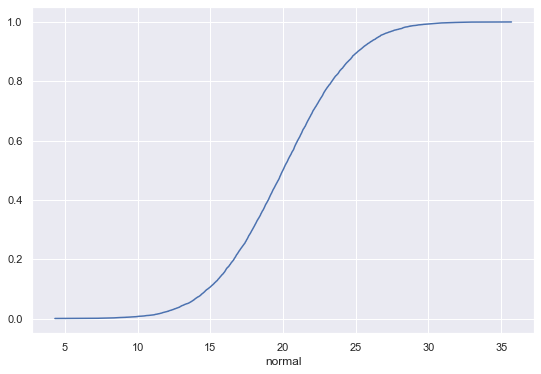

In [31]:
plt.figure(figsize = (9,6) )
sns.lineplot(dataframe["normal"], prob)
#sns.lineplot(dataframe["normal"], prob_teorica)
plt.show()

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [32]:
def q3():
    # Retorne aqui o resultado da questão 3.
    m_norm = dataframe["normal"].mean()
    v_norm = dataframe["normal"].var()
    m_binom = dataframe["binomial"].mean()
    v_binom = dataframe["binomial"].var()
    result = ( round(m_binom - m_norm, 3), round( v_binom - v_norm , 3) )
    return result

In [33]:
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

### Passos usados na questão 3

**Calculando a média da coluna "normal"**

In [34]:
dataframe["normal"].mean()

19.991456066526293

**Calculando a variância da coluna "normal"**

In [35]:
dataframe["normal"].var()

16.110987985368915

**Calculando a média da coluna "binomial"**

In [36]:
dataframe["binomial"].mean()

20.097

**Calculando a variância da coluna "binomial"**

In [37]:
dataframe["binomial"].var()

16.331224122412237

**calculando as diferenças entre as médias e as variâncias**

In [38]:
dif_m = dataframe["binomial"].mean() - dataframe["normal"].mean()

In [39]:
dif_v = dataframe["binomial"].var() - dataframe["normal"].var() 

In [40]:
dif_m

0.10554393347370805

In [41]:
dif_v

0.22023613704332234

**Obtendo o resultado**

In [42]:
result = ( round(dif_m, 3), round(dif_v, 3) )

In [43]:
result

(0.106, 0.22)

## Parte 2

### _Setup_ da parte 2

In [44]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [45]:
# Sua análise da parte 2 começa aqui.
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [46]:
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [47]:
stars["target"].value_counts()

False    16258
True      1639
Name: target, dtype: int64

In [48]:
false_pulsar_mean_profile = stars[(stars["target"] == 0)]["mean_profile"]

In [49]:
false_pulsar_mean_profile

0        102.507812
1        103.015625
2        136.750000
3         88.726562
4         93.570312
            ...    
17892    136.429688
17893    122.554688
17894    119.335938
17895    114.507812
17896     57.062500
Name: mean_profile, Length: 16258, dtype: float64

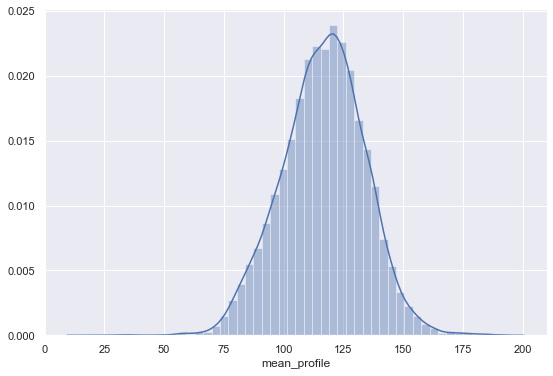

In [50]:
plt.figure(figsize = (9,6) )
sns.distplot(false_pulsar_mean_profile)
plt.show()

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [51]:
false_pm_profile = stars[(stars["target"] == 0)]["mean_profile"]
false_pulsar_mean_profile_standardized = (false_pm_profile - false_pm_profile.mean() )/false_pm_profile.std()

In [52]:
def q4():
    # Retorne aqui o resultado da questão 4.
    q80 = sct.norm.ppf(0.8, loc=0, scale=1)
    q90 = sct.norm.ppf(0.9, loc=0, scale=1)
    q95 = sct.norm.ppf(0.95, loc=0, scale=1)
    fd_emp = ECDF(false_pulsar_mean_profile_standardized)
    result = ( fd_emp(q80).round(3), fd_emp(q90).round(3), fd_emp(q95).round(3) )
    return result

In [53]:
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`? 

**A partir dos resultados abaixo podemos dizer que a ditribuição desta variável é aproximadamente normal. Abaixo apresentamos o gráfico da ditribuição de** `false_pulsar_mean_profile_standardized`.  ***Para confirmar a afirmação de que a variável é normalmente distribuida seria necessário fazer um teste de normalidade de Shapiro Wilk ou Anderson Darling ou de Kolmogorov-Smirnov.***

### Passos da questão 4

In [54]:
false_pm_profile = stars[(stars["target"] == 0)]["mean_profile"]

In [55]:
false_pm_profile.reset_index()

,index,mean_profile
0,0,102.507812
1,1,103.015625
2,2,136.750000
3,3,88.726562
4,4,93.570312
...,...,...
16253,17892,136.429688
16254,17893,122.554688
16255,17894,119.335938
16256,17895,114.507812


In [56]:
false_pulsar_mean_profile_standardized = (false_pm_profile - false_pm_profile.mean() )/false_pm_profile.std()

In [57]:
false_pulsar_mean_profile_standardized

0       -0.804181
1       -0.775123
2        1.155263
3       -1.592787
4       -1.315613
           ...   
17892    1.136934
17893    0.342963
17894    0.158776
17895   -0.117504
17896   -3.404704
Name: mean_profile, Length: 16258, dtype: float64

**Distribuição da variável "false_pulsar_mean_profile_standardized"**

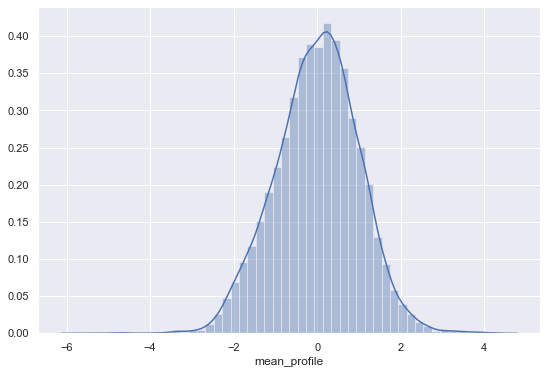

In [58]:
plt.figure(figsize = (9,6) )
sns.distplot(false_pulsar_mean_profile_standardized)
plt.show()

**Obtendo os percentis 80, 90 e 95 da distribuição normal padrão**

In [59]:
q80 = sct.norm.ppf(0.8, loc=0, scale=1)

In [60]:
q80

0.8416212335729143

In [61]:
q90 = sct.norm.ppf(0.9, loc=0, scale=1)

In [62]:
q90

1.2815515655446004

In [63]:
q95 = sct.norm.ppf(0.95, loc=0, scale=1)

In [64]:
q95

1.6448536269514722

**Obtendo a função de distribuição empirica**

In [65]:
fd_emp = ECDF(false_pulsar_mean_profile_standardized)

**Calculando a probabilidade acumulada $P(X < q80)$**

In [66]:
fd_emp(q80)

0.8055726411612745

**Calculando a probabilidade acumulada $P(X < q90)$**

In [67]:
fd_emp(q90)

0.9105671054250215

**Calculando a probabilidade acumulada $P(X < q95)$**

In [68]:
fd_emp(q95)

0.9587895190060278

In [69]:
result = ( fd_emp(q80).round(3), fd_emp(q90).round(3), fd_emp(q95).round(3) )

In [70]:
result

(0.806, 0.911, 0.959)

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [71]:
def q5():
    # Retorne aqui o resultado da questão 5.
    quart_emp = false_pulsar_mean_profile_standardized.quantile(q = [0.25, 0.50, 0.75])
    quart_teo = sct.norm.ppf(q = [0.25, 0.50, 0.75])
    difer = quart_emp - quart_teo
    return tuple(difer.round(3))

In [72]:
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.